In [1]:
import pandas as pd
from toolbox_ML import *
from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cargamos los **datos** del ejemplo de los precios de las casas en California

In [2]:
df_casas = pd.read_csv('./data/ejemplo_housing.csv')

Echamos un vistazo de los datos en el DF

In [ ]:
df_casas.head()

In [ ]:
df_casas.info()

### 2. Implementación de las funciones creadas en **Toolbox_ML**

#### Función `describe_df`

 Esta función muestra información específica del DF original. 
 
 Esa información será: el tipo de objeto, el % de valores nulos o missings, los valores únicos y el % de cardinalidad de cada columna del DF original.

 *Argumentos*:

 `df`: DF original sobre el que queremos recibir la información.

 *Retorna*:

DF con la información específica.

In [ ]:
describe_df(df_casas)

#### Función `tipifica_variables`

Esta función sirve para poder tipificar las variables de un DF dado en categórica, numerica continua o numerica discreta.

*Argumentos:*

`df`: DF original para adquirir las variables que se quiera tificar.
`umbral_categoria`: un entero donde corresponda al umbral que queramos asignar a una variable categórica.
`umbral_continua`: un float donde corresponda al umbral que queramos asignar a una variable numérica.

*Retorna:*

Un DF con dos columnas `nombre_varibale` y `tipo_sugerido`, que tendrá tantas filas como columnas haya en el DF original.

In [ ]:
# Cheque del control de errores

tipifica_variables(df_casas, 8.9, 10.0) # dos floats en los argumentos umbral_continua y umbral_categoria

In [ ]:
tipifica_variables(df_casas, 6, 4) # dos enteros en los argumentos umbral_continua y umbral_categoria

In [ ]:
tipifica_variables(df_casas, 7, 4.0) # Forma correcta

#### Función `get_features_num_regression`

Obtiene las columnas numéricas cuya correlación con target_col es significativa.

*Argumentos*:

`df`: DataFrame que contiene los datos.

`target_col`: Nombre de la columna objetivo (debe ser numérica).

`umbral_corr`: Umbral de correlación para filtrar las columnas.

`pvalue`: Umbral de significancia para el valor p. Si es None, solo se considera el umbral de correlación.


*Retorna*:

Lista de nombres de columnas que cumplen con los criterios.

In [ ]:
#Chequeo de errores
get_features_num_regression(df_casas, 'median_house_value', 2) # umbral_corr con numero entero

In [ ]:
get_features_num_regression(df_casas, 'median_house_value', 2.3) #umbnral corr con valor >1

In [ ]:
get_features_num_regression(df_casas, 'ocean_proximity', 0.5) # target_col de tipo categorico

In [ ]:
# Si pvalue == None
get_features_num_regression(df_casas, 'median_house_value', 0.05)

In [ ]:
# Si el pvalue != None
get_features_num_regression(df_casas, 'median_house_value', 0.05, 0.95)

#### Función `plot_features_num_regression`

Esta función sirve para visualizar aquellas variables que tengan correlación con la variable objetivo.

*Argumentos*:

`df`: DataFrame que contiene los valores.

`target_col`: Teniendo un valor por defecto "".

`columns`: Lista de strings cuyo valor por defecto es una lista vacía.

`umbral_corr`: Con valor por defecto 0

`pvalue`: Umbral de significancia para el valor p. Por defecto, con valor None

*Retorna*:

Un pairplot del DataFrame consirando los valores adjuducados en cada argumento de la función.

Como no hay columnas en la lista del argumento usamos las numéricas, que son:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Las columnas válidas para el pairplot son ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


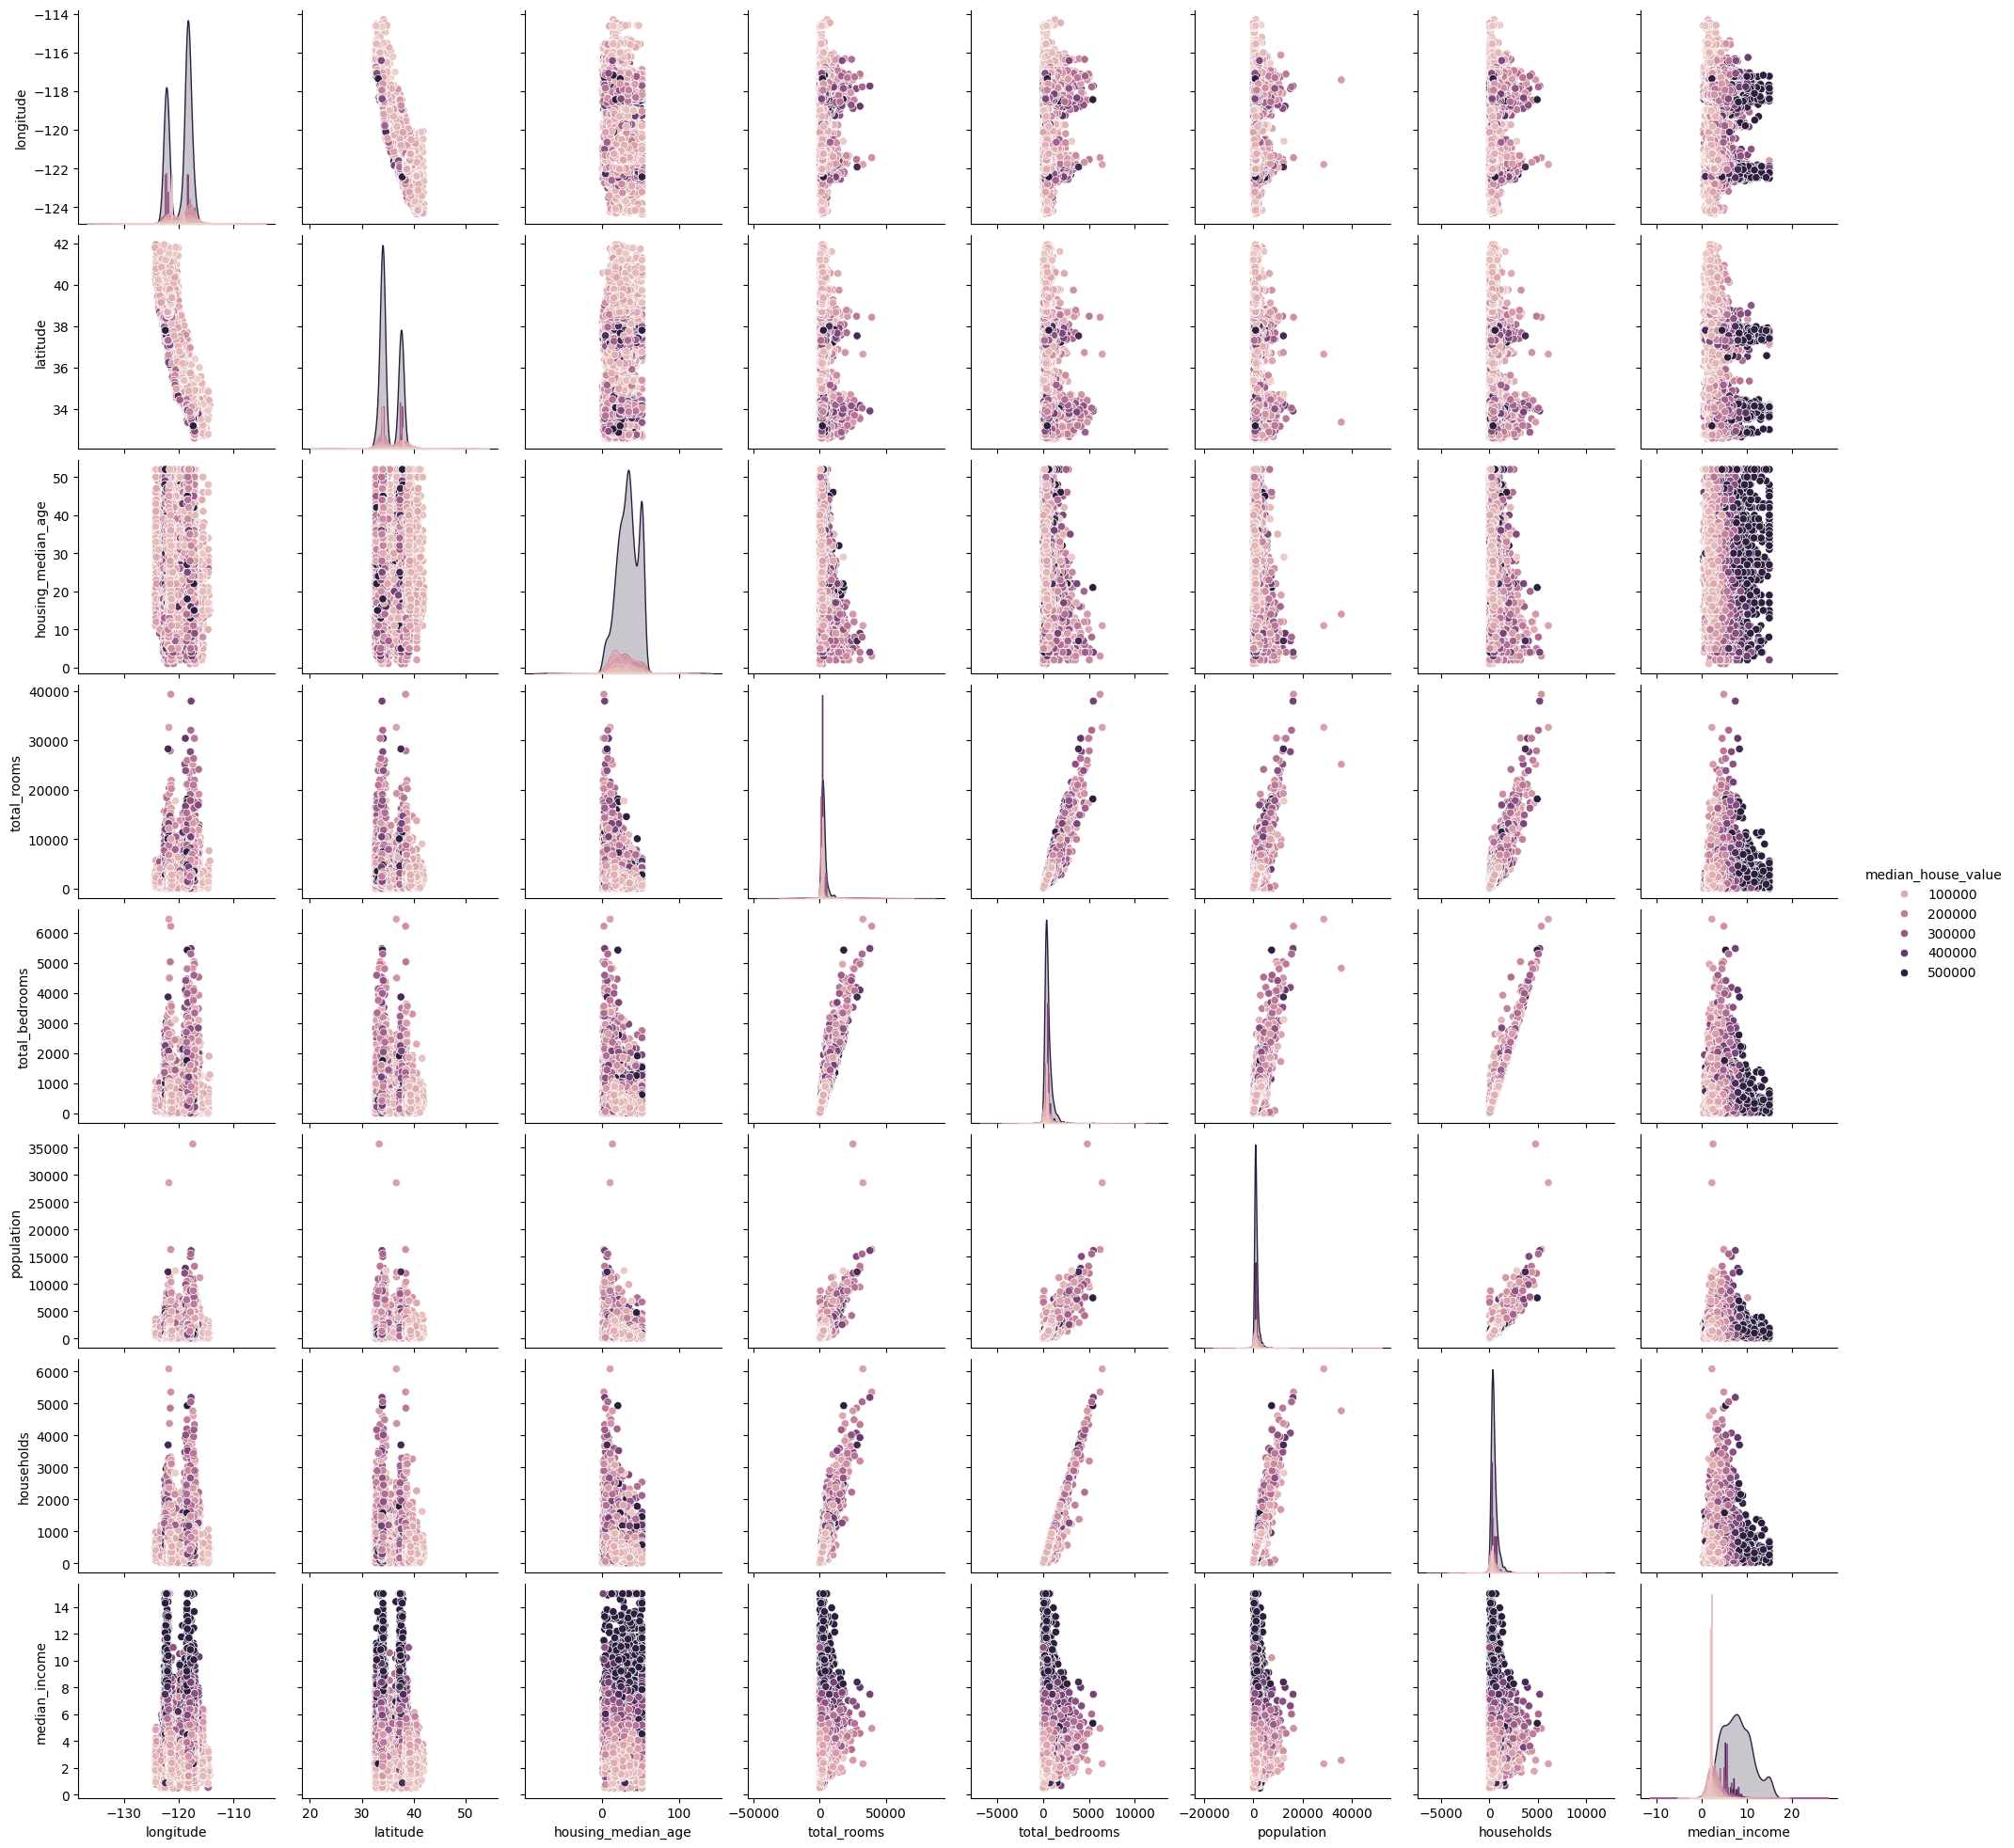

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [7]:
plot_features_num_regression (df_casas, target_col="median_house_value", columns=[], umbral_corr=0.01, pvalue=None)

Como no hay columnas en la lista del argumento usamos las numéricas, que son:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Las columnas válidas para el pairplot son ['latitude', 'housing_median_age', 'total_rooms', 'median_income']


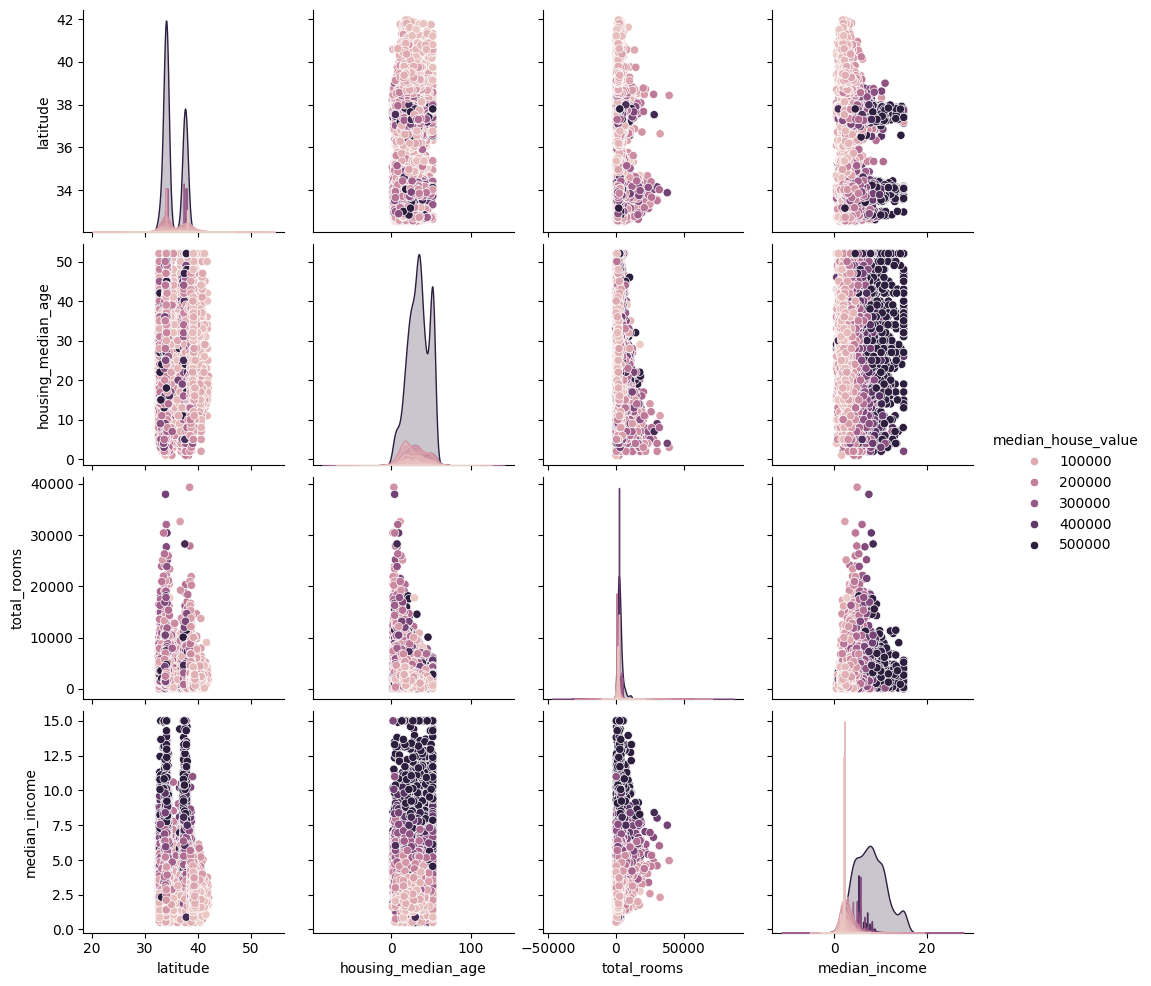

['latitude', 'housing_median_age', 'total_rooms', 'median_income']

In [15]:
plot_features_num_regression(df_casas, target_col= "median_house_value", umbral_corr=0.1) #probamos a subir el umnbral de correlación a 0.1

Como no hay columnas en la lista del argumento usamos las numéricas, que son:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Las columnas válidas para el pairplot son ['median_income']


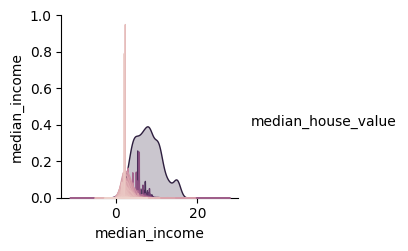

['median_income']

In [16]:
plot_features_num_regression(df_casas, target_col= "median_house_value", umbral_corr=0.5) #probamos a subir el umnbral de correlación a 0.5

#### Función `get_features_cat_regression`

Esta funcion devueleve una lista con las variables categoricas del dataframe que guardan una relacion siginificativa con la variable target, superando el test ANOVA con una confianza estadistica del 95%. Evalua los argumentos de entrada y retornara None en caso de que alguno de los valores de entrada no sean adecuados. 

*Argumentos:*

`df` : (`pd.Dataframe`) Dataframe con las variables que se quieren testar.
`target_col` : (`df["columna_target"]`) Columna del dataframe que se toma como objetivo (y).
`p_value` : (`float`) Por defecto `0.05`. Umbral de confianza estadistica. 

*Retorna:*

Una `lista` con las variables categoricas del dataframe. 

In [ ]:
#Control de errores:
df_prueba = ["casa_n", "distancia_mar"] # Hacemos un df erróneo de prueba
get_features_cat_regression(df_prueba, "median_house_income")

In [ ]:
get_features_cat_regression(df_casas, "income") # probamos a meter una columna que no existe

In [ ]:
get_features_cat_regression(df_casas, "ocean_proximity") # probamos a meter como argumento target_col una variable que no es continua

In [ ]:
get_features_cat_regression(df_casas, "median_house_value")

In [ ]:
get_features_cat_regression(df_casas, "median_house_value", 0.01) # Probamos a subir el pvalor

In [ ]:
get_features_cat_regression(df_casas, "median_income") # Probamos con otra columna target 

In [30]:
df_titanic = pd.read_csv('./data/titanic.csv') # probamos con otro dataframe distinto, donde hay más columnas categóricas

In [ ]:
get_features_cat_regression(df_titanic, 'fare')

### Función `plot_features_cat_regression`

Esta función genera histogramas agrupados para variables categóricas y evalúa su relación con una columna objetivo usando un test estadístico, devolviendo las columnas que cumplen con un criterio de significancia.

Argumentos:

	
-	df (pd.DataFrame): DataFrame con los datos.
-	target_col (str): Columna objetivo - numérica contínua o discreta con alta cardinalidad (por defecto "").
-	columns (list): Lista de columnas categóricas a evaluar (por defecto vacía).
-	pvalue (float): Nivel de significancia estadística (por defecto 0.05).
-	with_individual_plot (bool): Si es True, genera histogramas individuales por categoría (por defecto False).

Comportamiento:

-	Si columns no está vacío, evalúa las variables categóricas en la lista y genera gráficos si son significativas. Utilizará ANOVA (Análisis de varianza)
-	Si columns está vacío, se toman las variables numéricas del DataFrame para el análisis. En este caso de utilizará el método de correlación de Pearson (mide la fuerza y la dirección de la relación lineal entre dos variables numéricas continuas. Su valor oscila entre -1 y 1:)

Retorna:

-	Lista de columnas que tienen una relación significativa con la columna objetivo.

In [ ]:
# Uso de la función sin generar histograma y lista de variables categóricas (para este caso solo hay una) 
plot_features_cat_regression (df_casas, "median_house_value", columns=["ocean_proximity"], with_individual_plot=False)

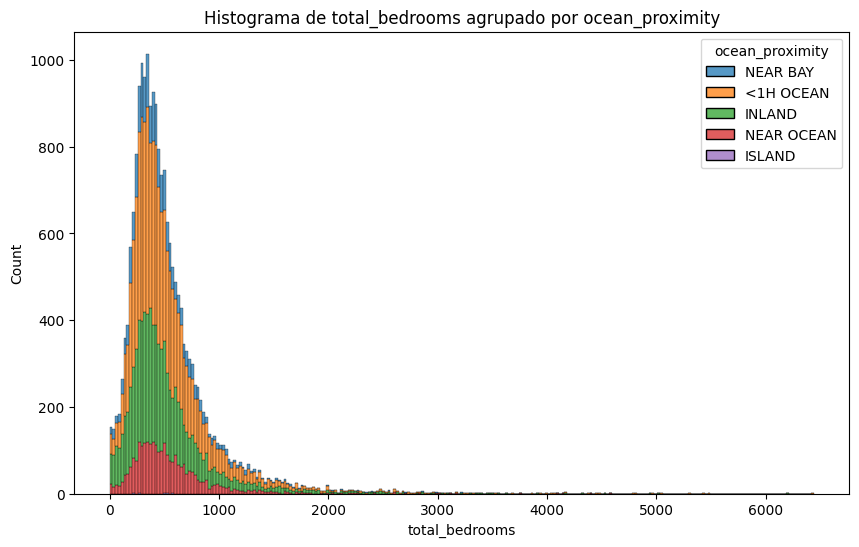

['ocean_proximity']

In [33]:
# Uso de la función generando histograma y lista de variables categóricas (para este caso solo hay una) 
plot_features_cat_regression (df_casas, "total_bedrooms", columns=["ocean_proximity"], with_individual_plot=True)

In [ ]:
# Uso de la función generando histograma, lista de variables categóricas (para este caso solo hay una), y modificando el pvalue
plot_features_cat_regression (df_casas, "total_bedrooms", columns=["ocean_proximity"], pvalue=0.01, with_individual_plot=True)

In [ ]:
# Uso de la función sin generar gráfico y lista de variables categóricas vacía
plot_features_cat_regression (df_casas, "median_house_value", columns=[], with_individual_plot=False)

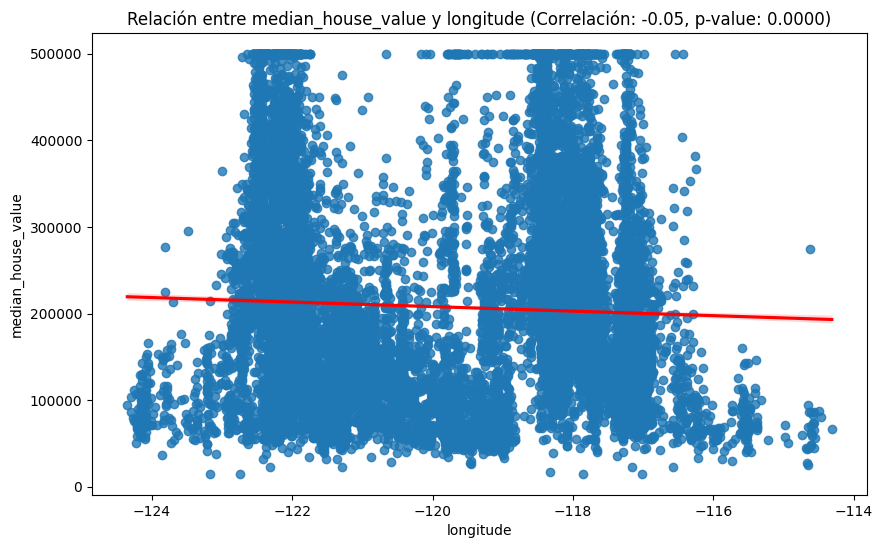

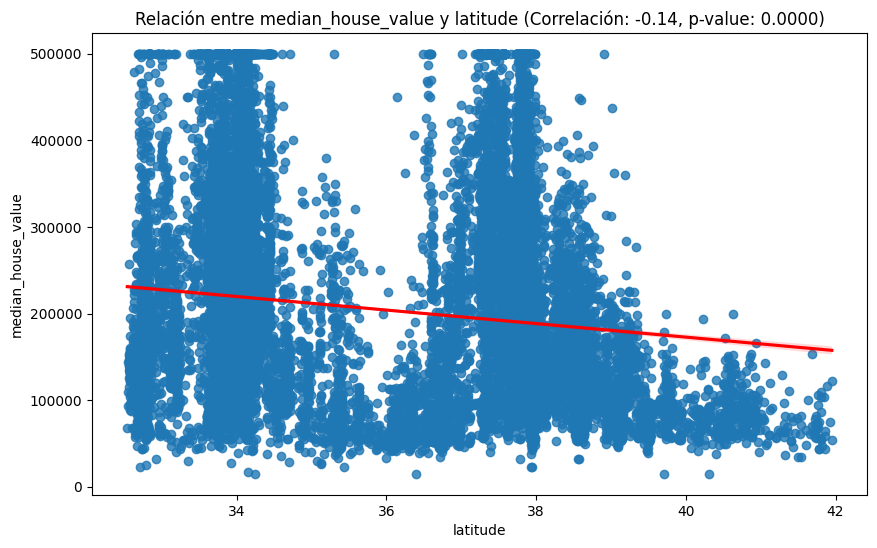

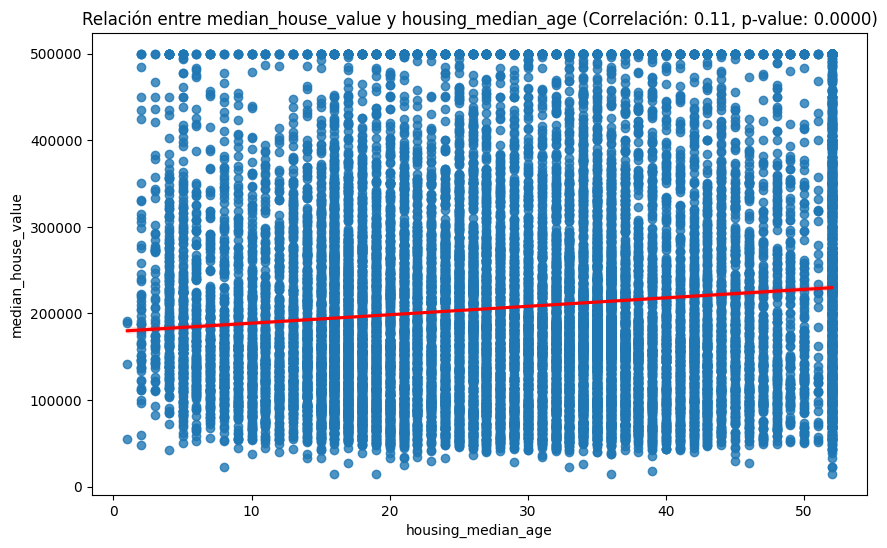

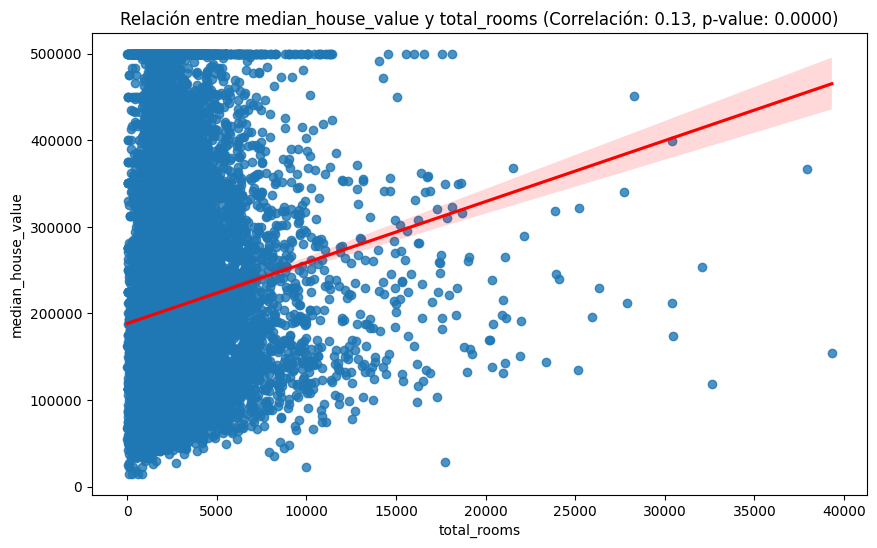

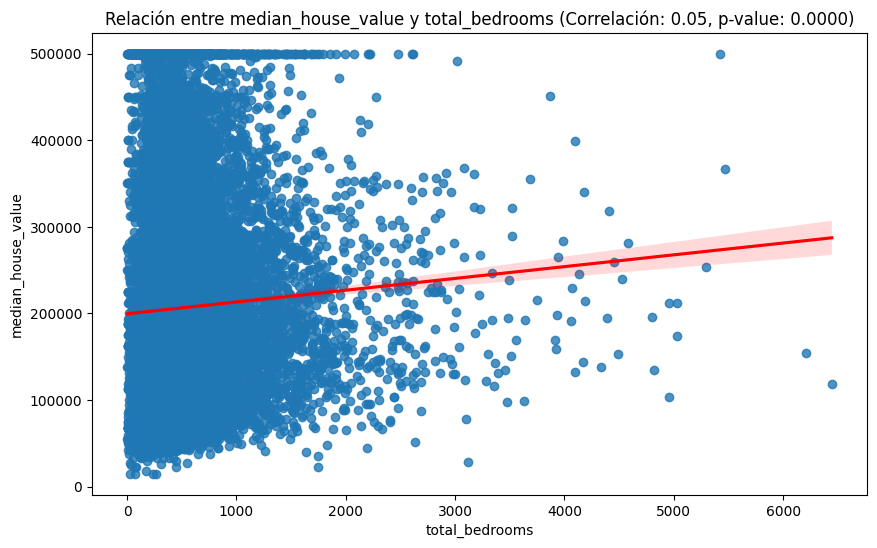

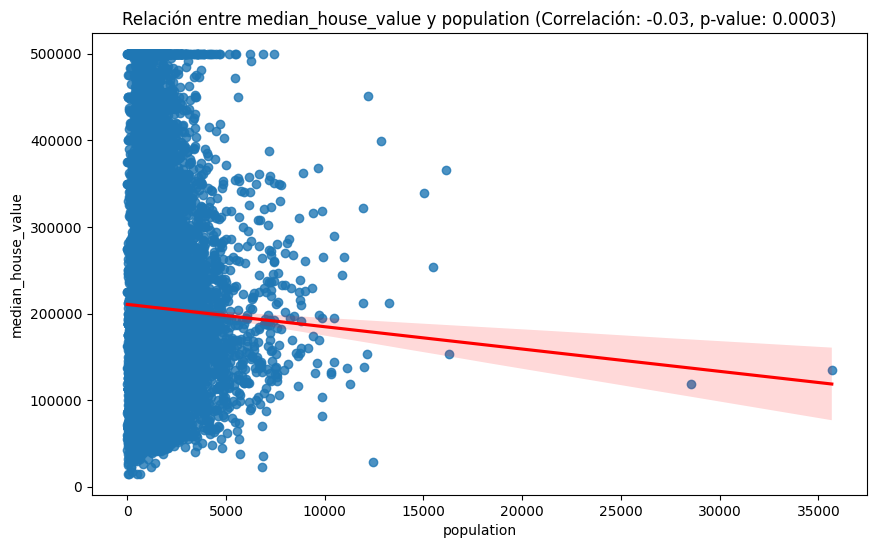

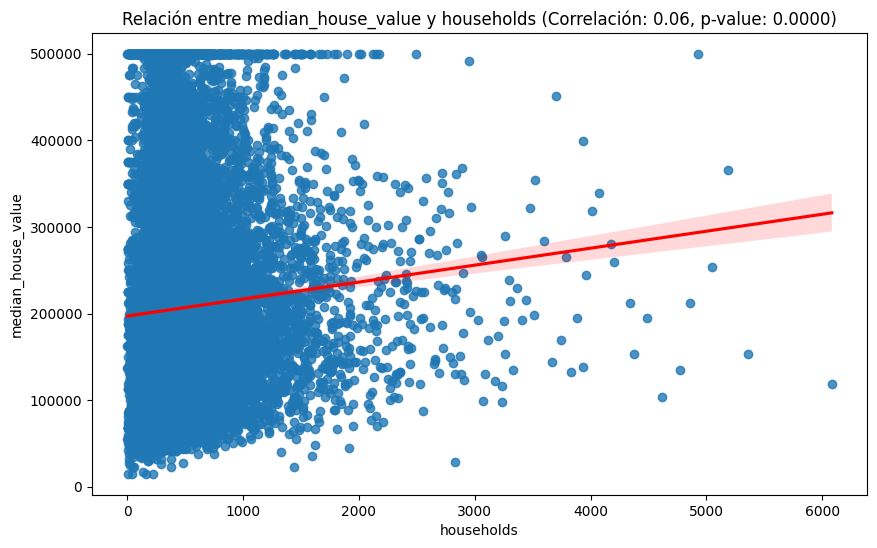

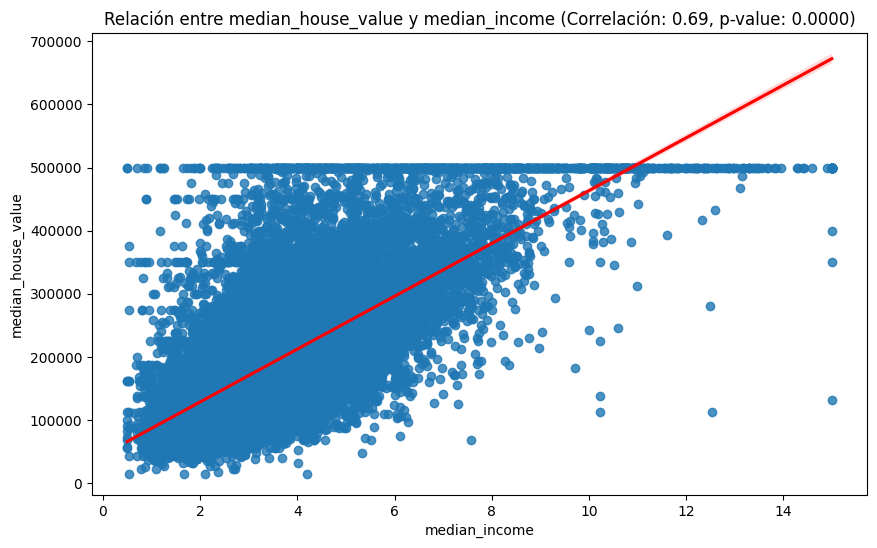

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [36]:
# Uso de la función generando gráfico y lista de variables categóricas vacía
plot_features_cat_regression (df_casas, "median_house_value", columns=[], with_individual_plot=True)